In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)


<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10mm",
     "2Mu2E_200GeV_5GeV_200mm",
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        #"baseNoLj_promptA",
        #"baseNoLj_displacedA",
        #"baseNoLj_veryDisplacedA",
        "baseNoLj_lowLxyA",
        "baseNoLj_highPtA",
        "baseNoLj_Lxy_upto250A"
        #"2mu2e",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

In [4]:
ch1= "baseNoLj"
ch2= "baseNoLj_lowLxyA"
ch3= "baseNoLj_highPtA"
ch4= "baseNoLj_Lxy_upto250A"

## Pt distribution with Lxy cut

#### .25 GeV Dark Photon

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce114ad60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce112a580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce11515b0>, errorbar=<ErrorbarContainer object of 3 artists>))

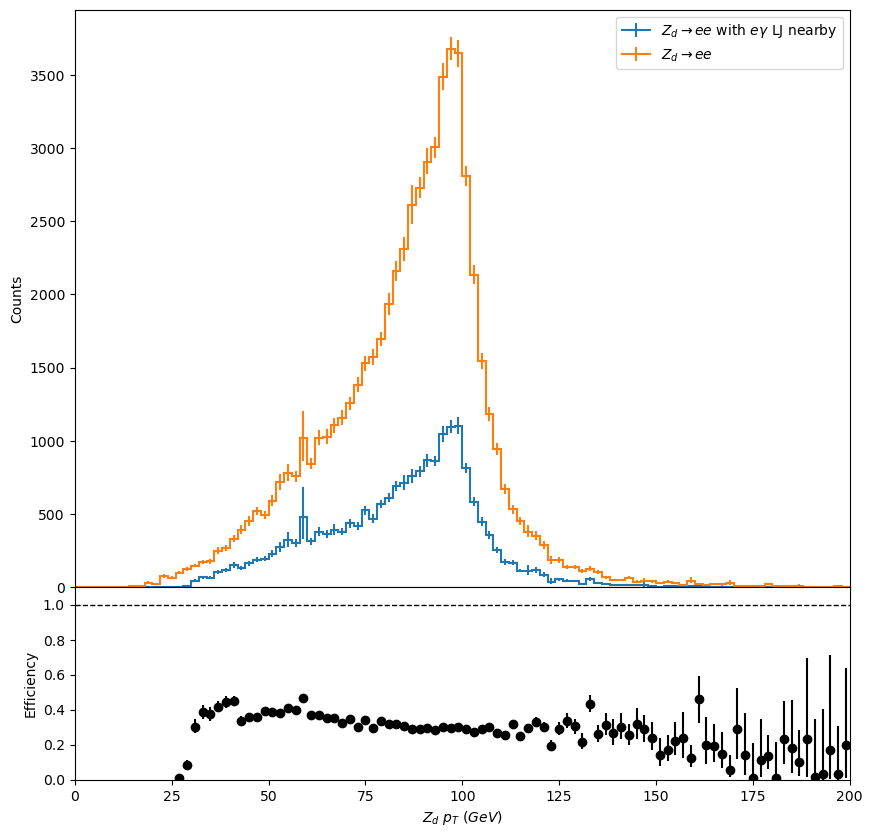

In [5]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_pt"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce3df7fd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce26340a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce0fcafd0>, errorbar=<ErrorbarContainer object of 3 artists>))

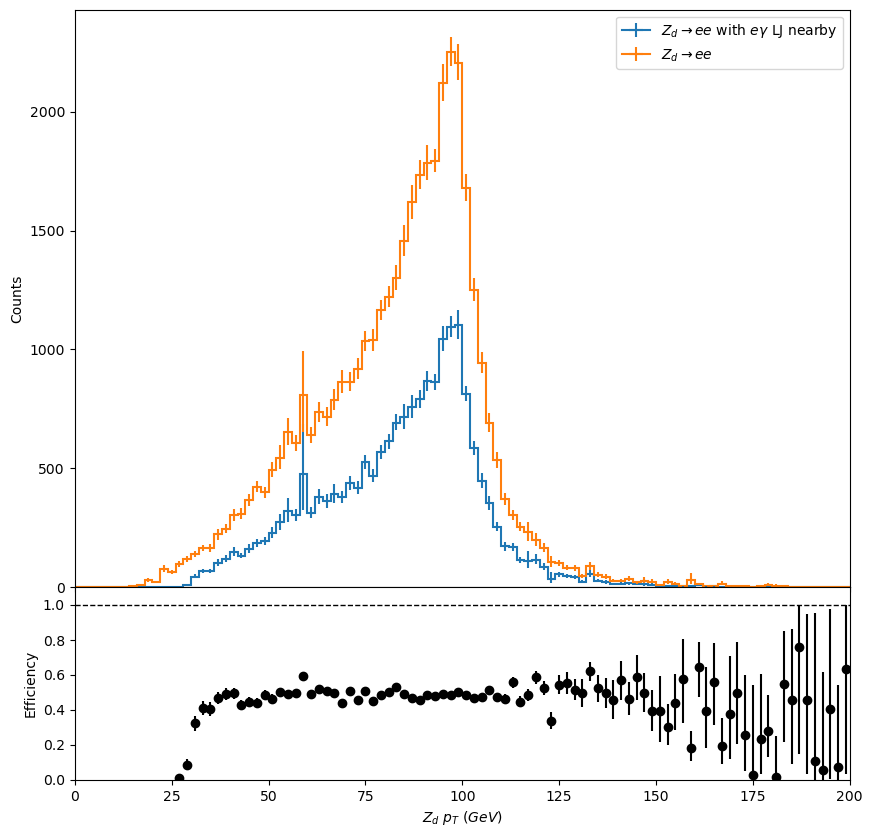

In [6]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_pt"][ch2,:], 
        rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj_lowLxyA")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce3c19cd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6cfdae60a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce1fb9e80>, errorbar=<ErrorbarContainer object of 3 artists>))

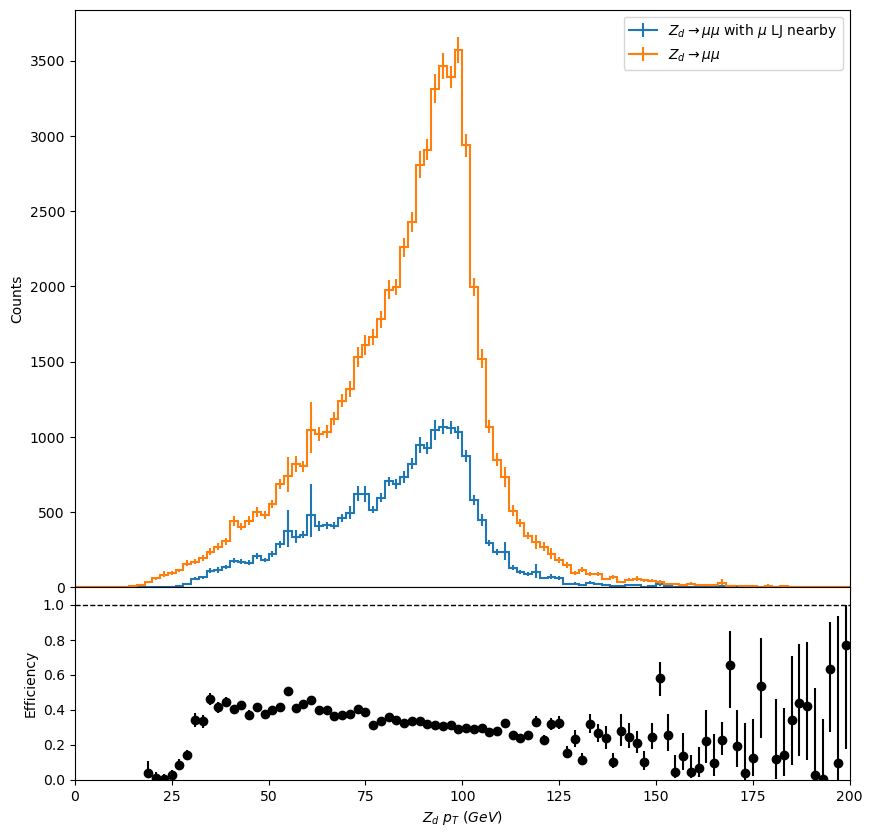

In [7]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_pt"][ch1,:], 
        rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0f95c40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0fa27c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce0f95850>, errorbar=<ErrorbarContainer object of 3 artists>))

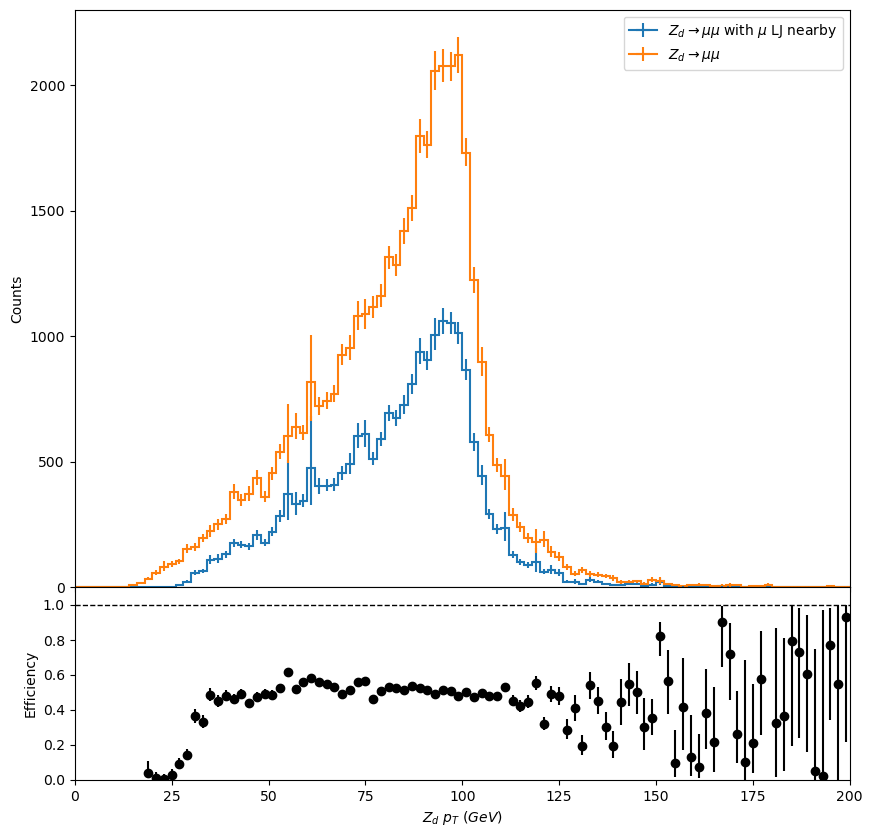

In [8]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_pt"][ch4,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj_lowLxyA")

#### 5 Gev Dark photon

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce3fda9a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f70bc46a6a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce3fd1a60>, errorbar=<ErrorbarContainer object of 3 artists>))

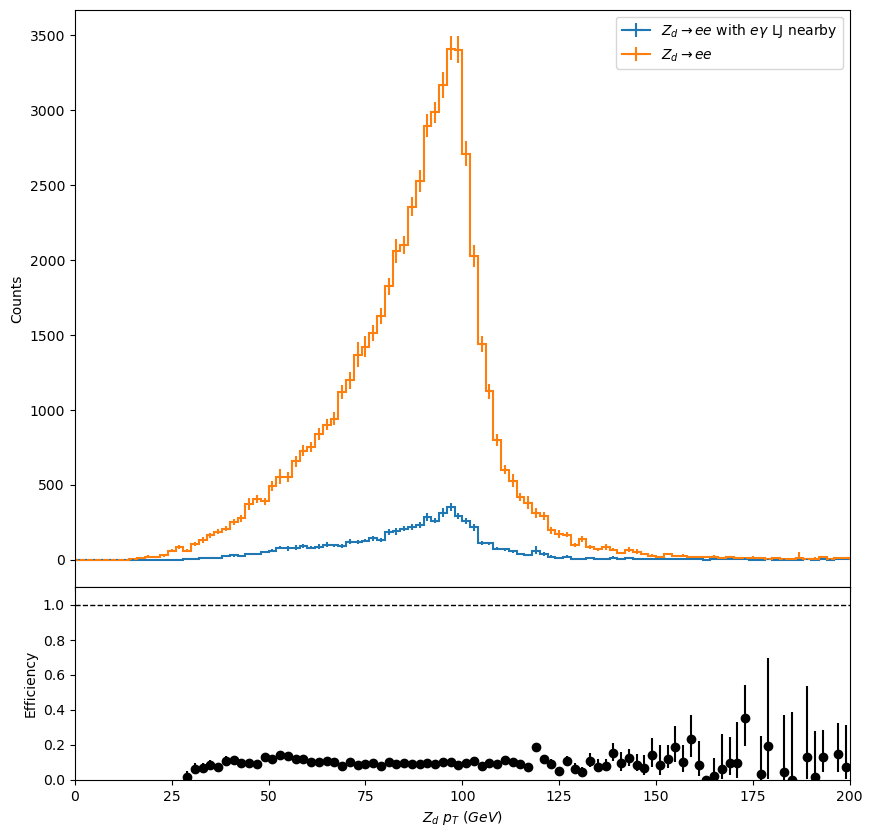

In [9]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_pt"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce36c2220>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6cfdb74e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce36d9df0>, errorbar=<ErrorbarContainer object of 3 artists>))

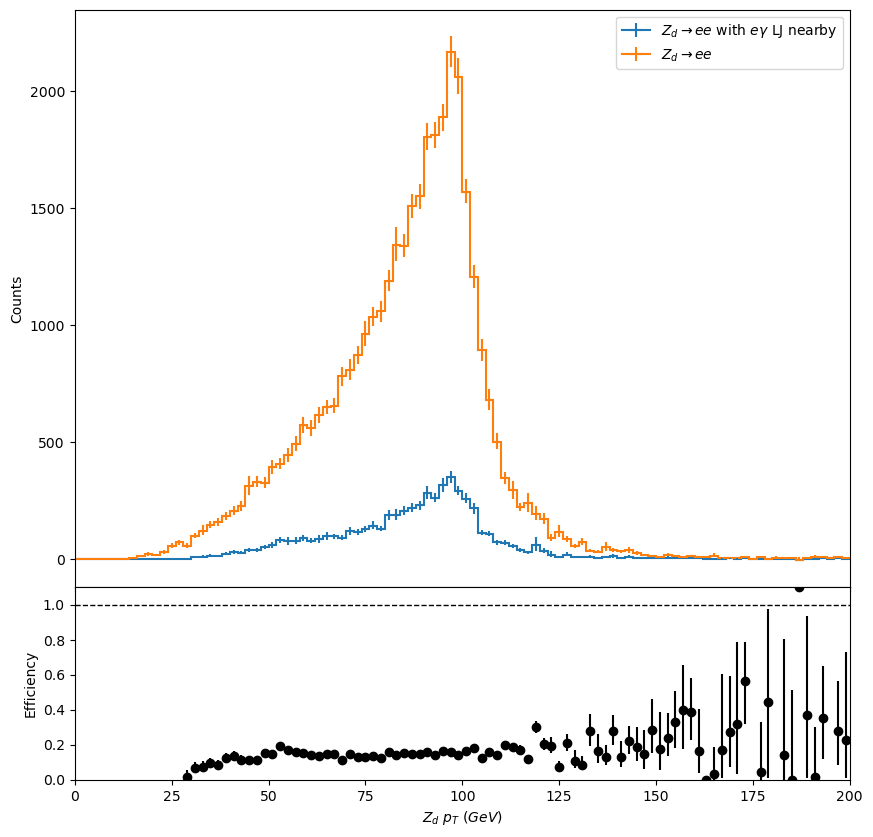

In [10]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_pt"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce1aaae20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce1b0a940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce1aaa820>, errorbar=<ErrorbarContainer object of 3 artists>))

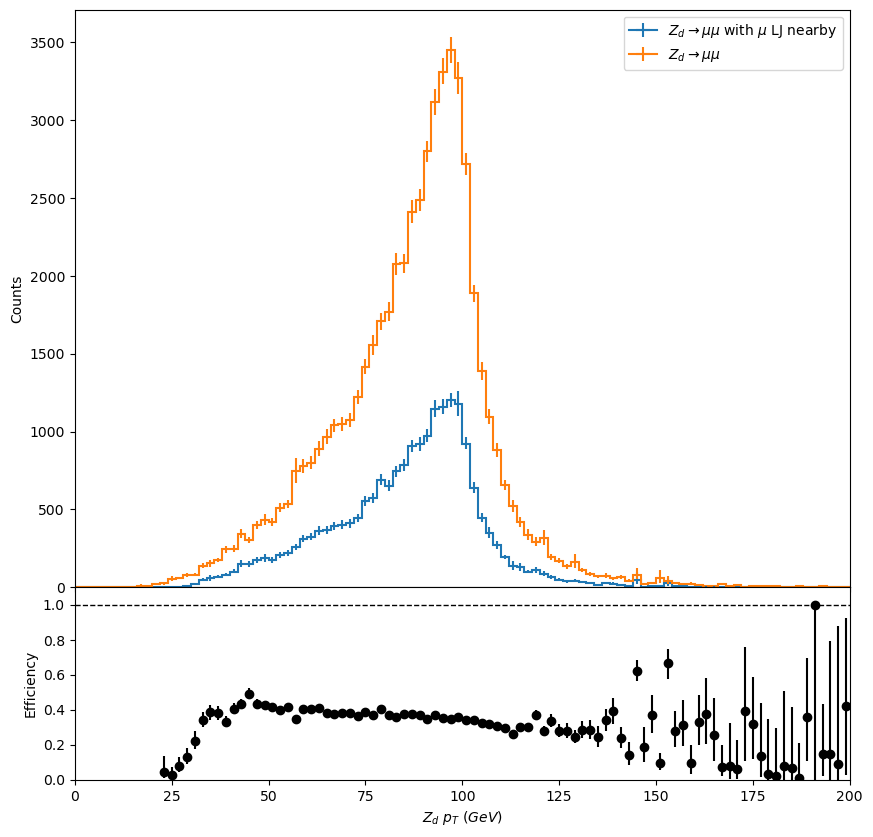

In [11]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_pt"][ch1,:], 
        rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce1dc6640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce1d94190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce1d798e0>, errorbar=<ErrorbarContainer object of 3 artists>))

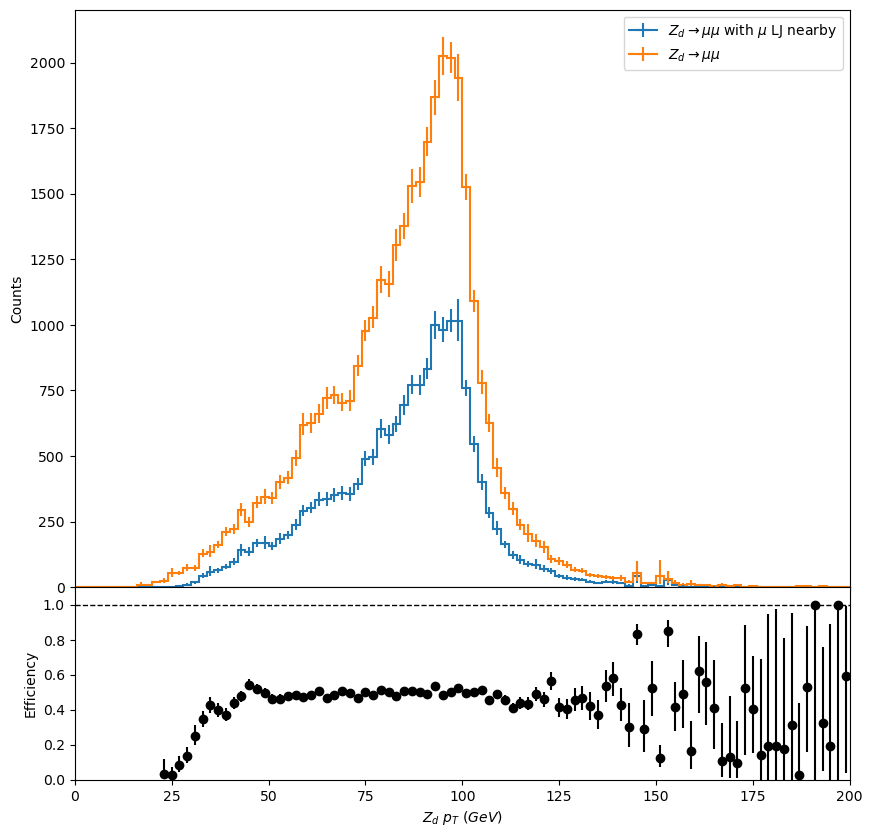

In [12]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_pt"][ch4,:], 
        rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

### Lxy Distribution with Pt cut

#### .25 Dark Photon

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce1c61850>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce1bbd460>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce1bfd910>, errorbar=<ErrorbarContainer object of 3 artists>))

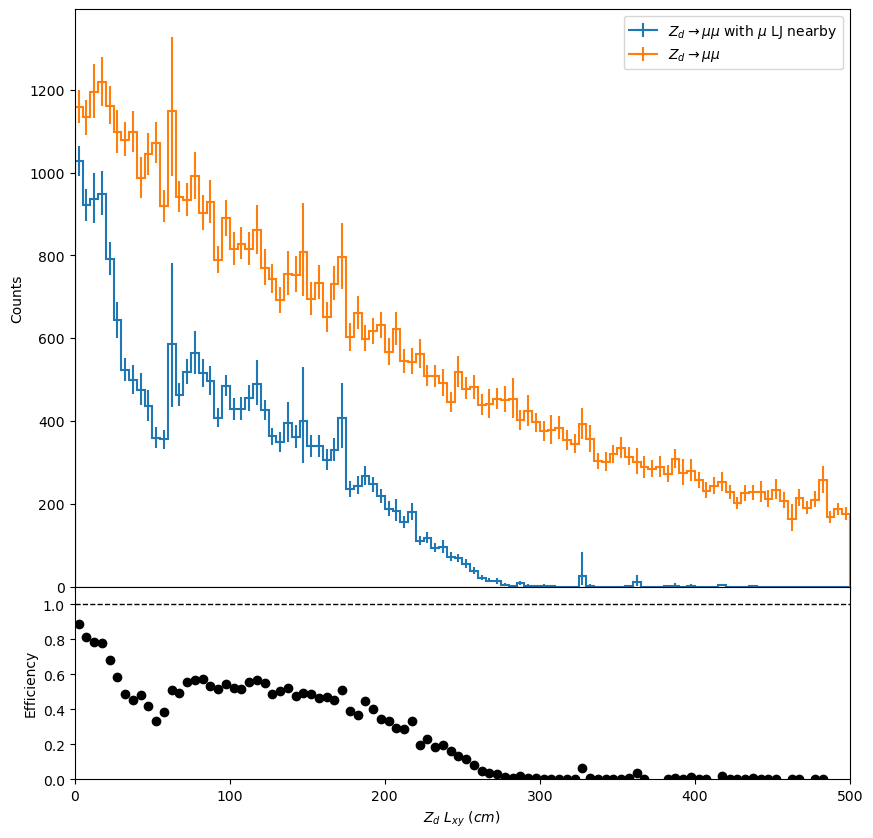

In [13]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0ef1910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0ebf5e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce0efe520>, errorbar=<ErrorbarContainer object of 3 artists>))

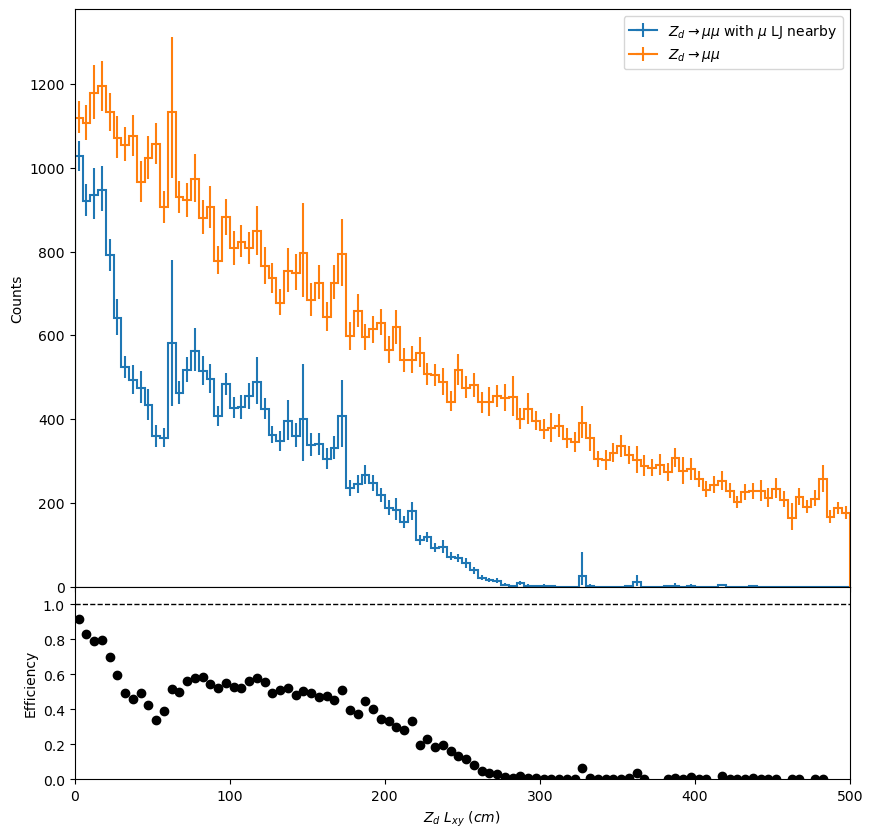

In [14]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_lxy"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0d38610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0cecee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce0d2d970>, errorbar=<ErrorbarContainer object of 3 artists>))

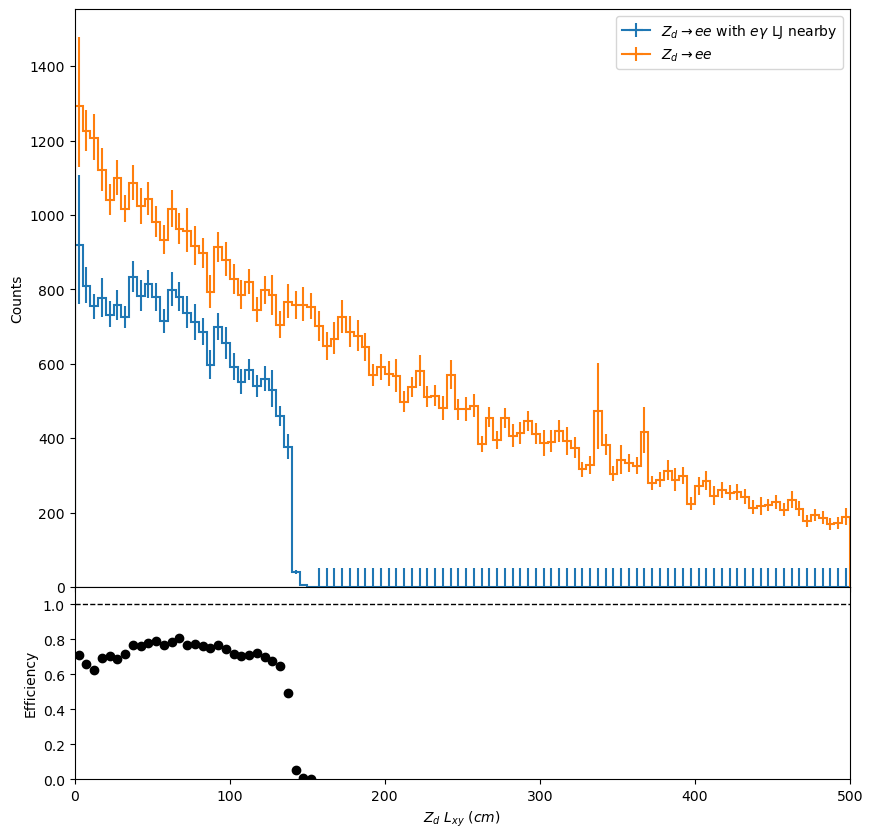

In [15]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0b4e970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0c3eca0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce0b4e340>, errorbar=<ErrorbarContainer object of 3 artists>))

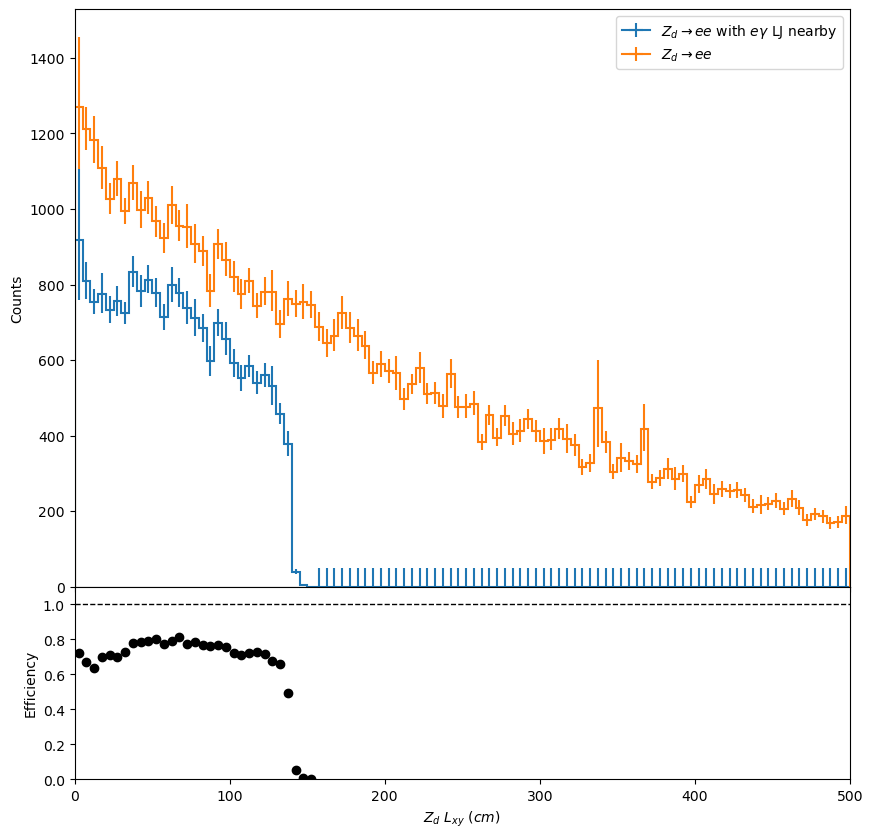

In [16]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_lxy"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

#### 5GeV Dark Photon

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0ac1190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce0a39970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6ce0ac1280>, errorbar=<ErrorbarContainer object of 3 artists>))

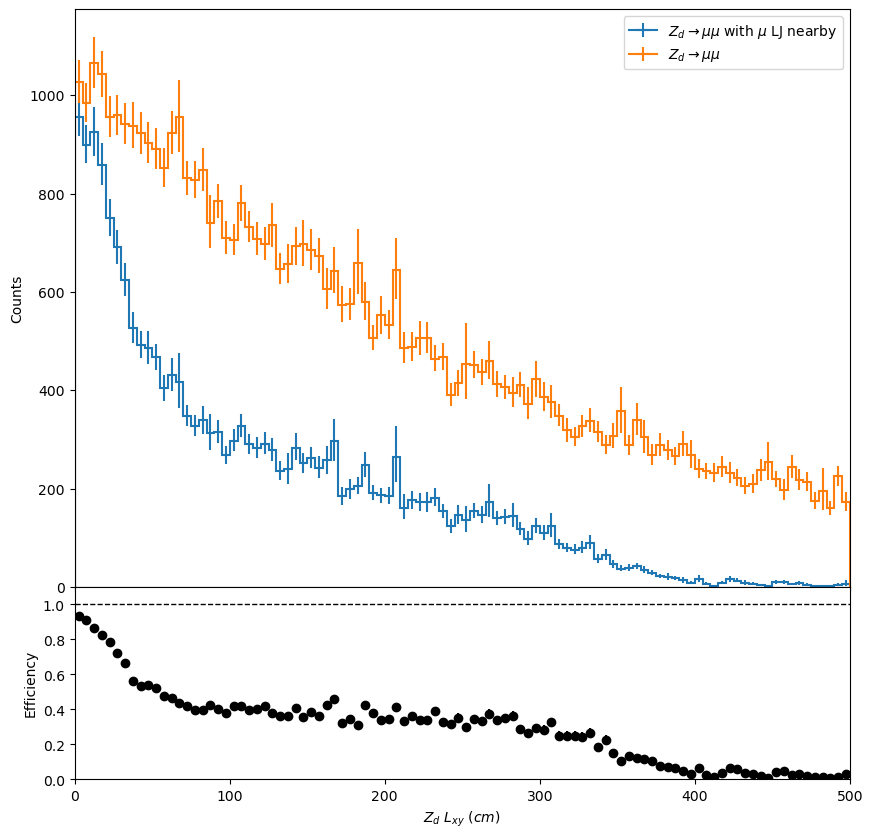

In [17]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6cf819a340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce389e070>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6cf84c0d30>, errorbar=<ErrorbarContainer object of 3 artists>))

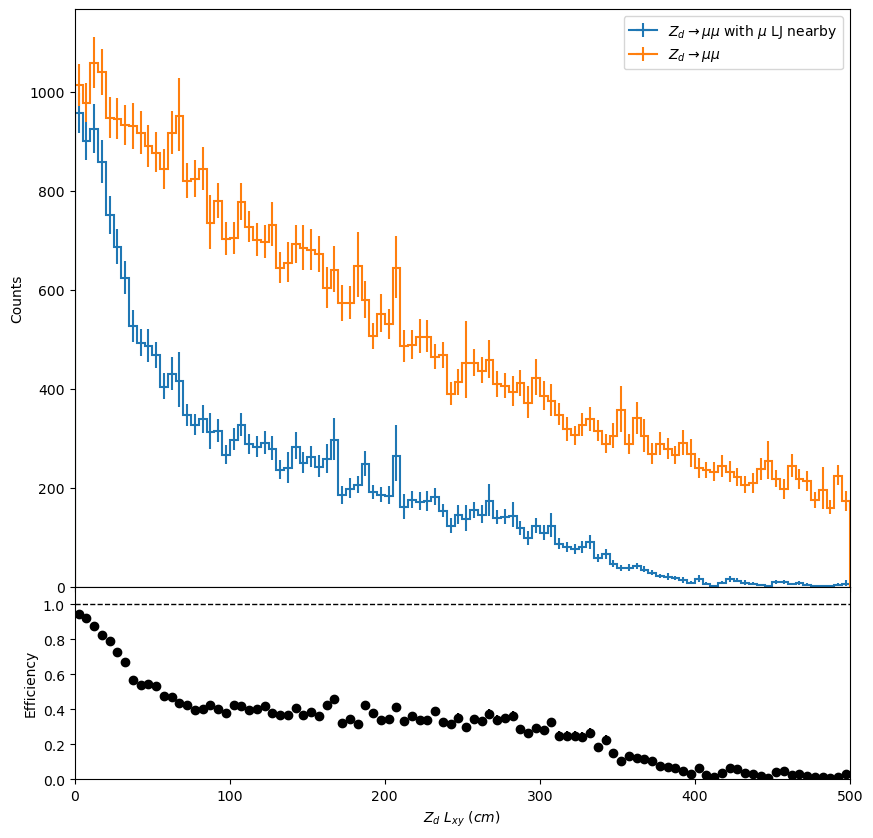

In [18]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_lxy"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6cf8282940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6cf828fac0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6cf8282a60>, errorbar=<ErrorbarContainer object of 3 artists>))

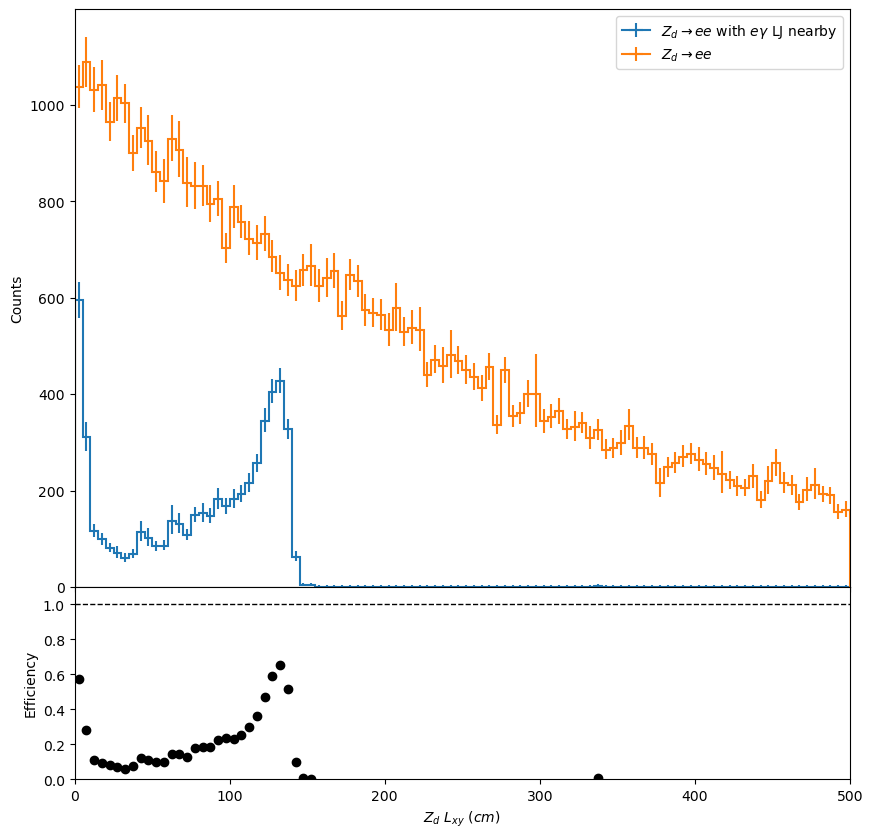

In [20]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6cf812b040>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6ce201f730>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f6cf812b910>, errorbar=<ErrorbarContainer object of 3 artists>))

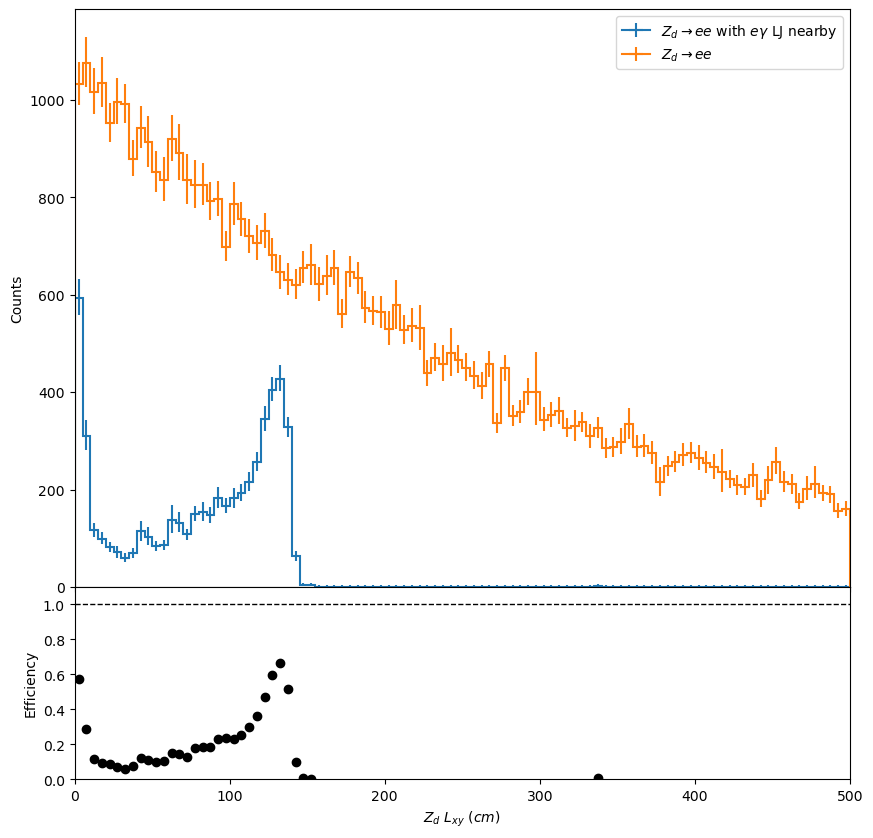

In [19]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_lxy"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")